In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [192]:
pip install statsmodels --upgrade

     ---------------------------------------- 9.4/9.4 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
df_1 = pd.read_csv('C:/Users/lenovo/Desktop/gani/ResearchProject/KTMK_monthly.csv')
df_1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,Apr-13,353.55,327.5,358.25,307.5,20.64M,8.28%
1,May-13,391.48,352,403.67,350.6,24.53M,10.73%
2,Jun-13,361.1,390.63,392.85,341.5,26.51M,-7.76%
3,Jul-13,326.17,361.5,381.15,311.25,37.96M,-9.67%
4,Aug-13,329.8,327.6,337.5,294,62.41M,1.11%


In [18]:
print(df_1.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')


In [19]:
df_2 = df_1[['Date','Price']]
df_2.head()

,Date,Price
0,Apr-13,353.55
1,May-13,391.48
2,Jun-13,361.1
3,Jul-13,326.17
4,Aug-13,329.8


In [23]:
df_2.dtypes

Date      object
Price    float64
dtype: object

In [21]:
from datetime import datetime
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\4214241446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')


In [22]:
df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\355248658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')


In [24]:
df_2.set_index('Date',inplace=True)

In [25]:
df_2.head()

,Price
Date,
2013-04,353.55
2013-05,391.48
2013-06,361.10
2013-07,326.17
2013-08,329.80


In [26]:
print('shape of data',df_2.shape)

shape of data (120, 1)


<AxesSubplot:xlabel='Date'>

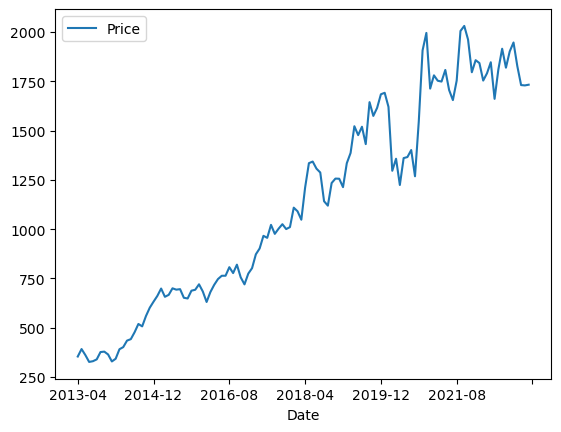

In [27]:
df_2.plot()

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
test_result=adfuller(df_2['Price'])

In [30]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['Price'])

ADF Test Statistic : -0.9831576208689407
p-value : 0.7593575007443908
#Lags Used : 8
Number of Observations Used : 111
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


In [31]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.Price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.983158
p-value: 0.759358


In [32]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_2.Price,test="adf")

0

In [33]:
df_2['first_diff'] = df_2['Price'].diff().dropna()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\1360018562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['first_diff'] = df_2['Price'].diff().dropna()


In [36]:
df_2.head()

,Price,first_diff
Date,,
2013-05,391.48,37.93
2013-06,361.10,-30.38
2013-07,326.17,-34.93
2013-08,329.80,3.63
2013-09,339.05,9.25


In [35]:
df_2.dropna(subset=['first_diff'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\2139689955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(subset=['first_diff'], inplace=True)


In [37]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['first_diff'])

ADF Test Statistic : -6.87495839012984
p-value : 1.4826863549446608e-09
#Lags Used : 7
Number of Observations Used : 111
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


In [38]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.first_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.874958
p-value: 0.000000


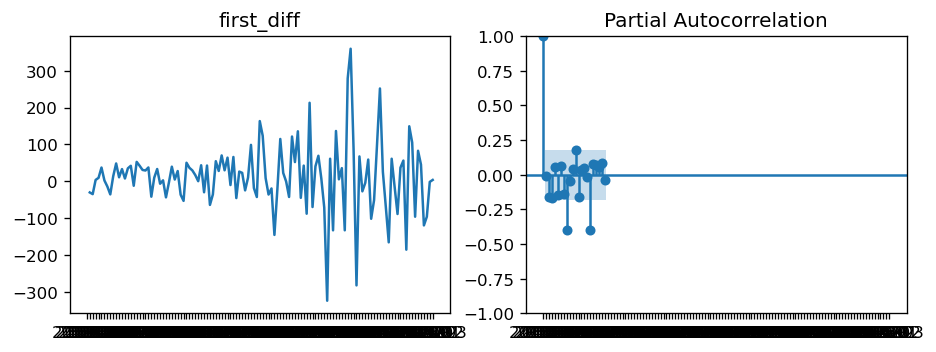

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('first_diff')
axes[1].set(ylim=(0,5))
plot_pacf(df_2.Price.diff().dropna(), ax=axes[1]) #plotiing of 1st diff

plt.show()
#p=0,d=1

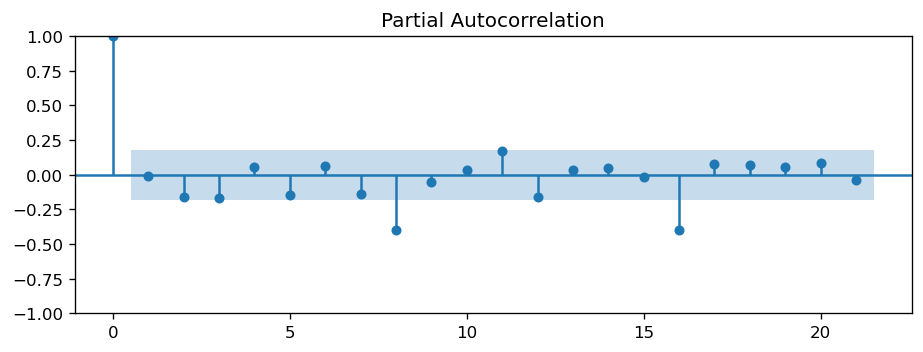

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.first_diff); axes[0].set_title('first_diff')
#axes[1].set(ylim=(0,5))
plot_pacf(df_2.first_diff.dropna())#, ax=axes[1])

plt.show()

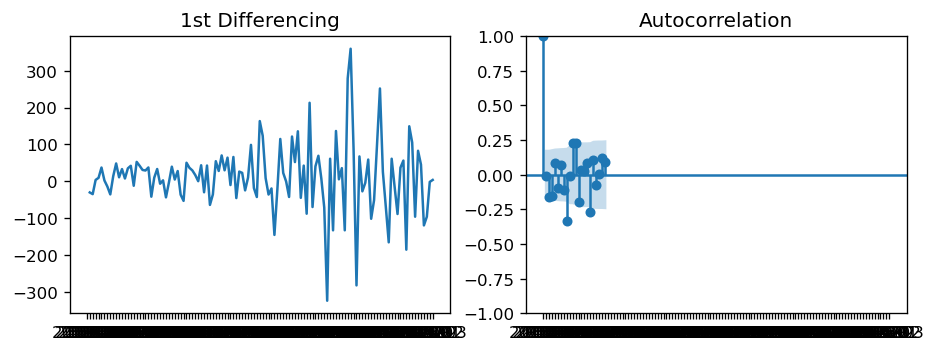

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna(), ax=axes[1])

plt.show()

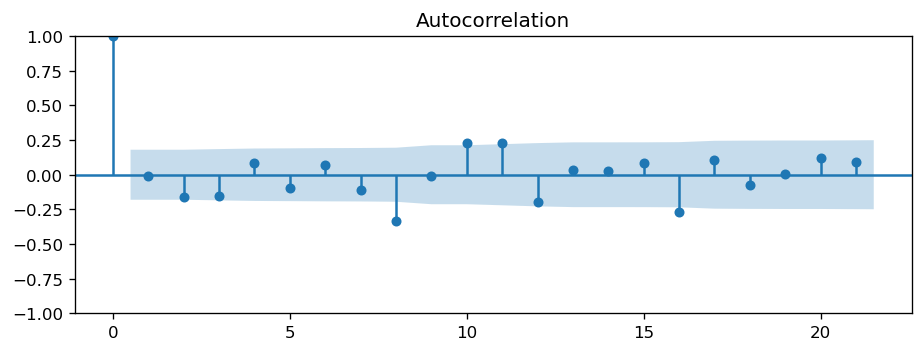

In [42]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna())

plt.show()
#q=0

In [49]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(df_2['Price'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -699.137
Date:                Mon, 13 Nov 2023   AIC                           1404.273
Time:                        23:53:53   BIC                           1412.585
Sample:                    05-01-2013   HQIC                          1407.648
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6964      0.280      2.490      0.013       0.148       1.244
ma.L1         -0.7885      0.258     -3.052      0.002      -1.295      -0.282
sigma2      8204.2472    725.021     11.316      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


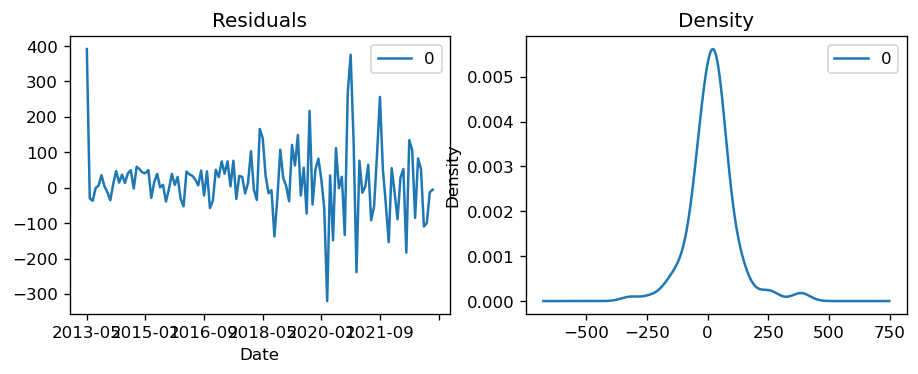

In [50]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [51]:
import matplotlib.pyplot as plt

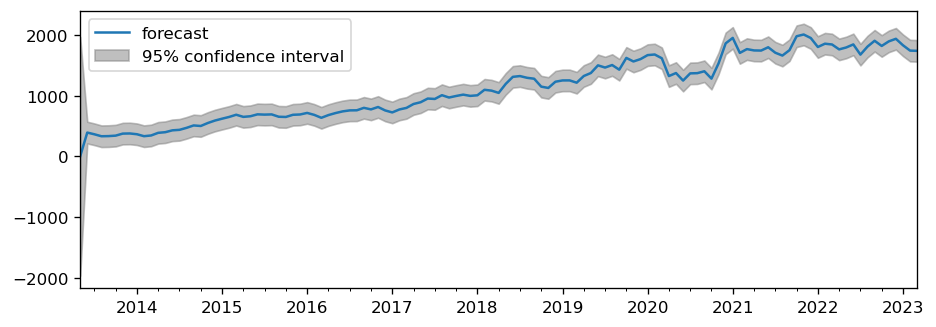

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit,dynamic=False)
plt.show()

In [53]:
from statsmodels.tsa.stattools import acf
# Assuming df is your DataFrame
train = df_2['Price'][:55] # first 55 values 
test = df_2['Price'][55:] # from 56th till last

In [54]:
print('shape of train\n',train.shape)
print('shape of train\n',test.shape)
#55+64 =119 (1 nan value)

shape of train
 (55,)
shape of train
 (64,)


In [55]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit() 

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [57]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [58]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


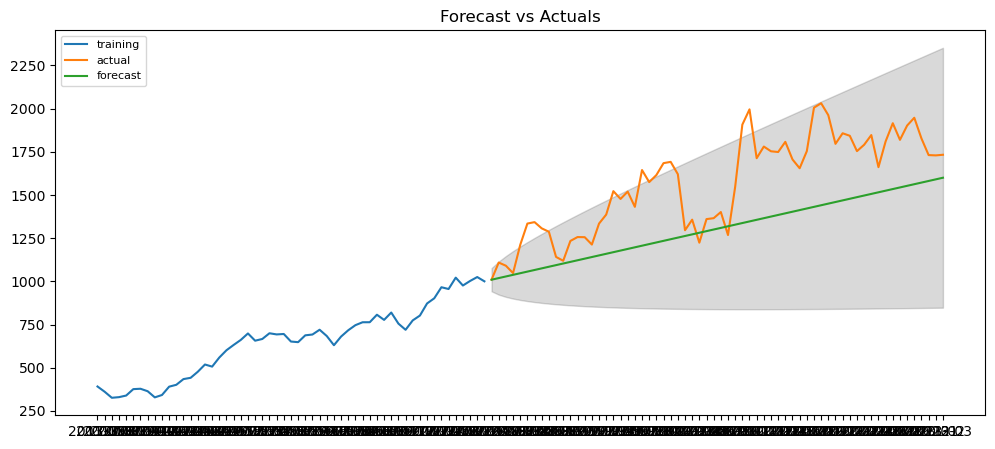

In [59]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [61]:
train.head()

Date
2013-05    391.48
2013-06    361.10
2013-07    326.17
2013-08    329.80
2013-09    339.05
Name: Price, dtype: float64

(1,2,1) MODEL

In [68]:
# Build Model

model = ARIMA(train, order=(1,2,2))  
fitted = model.fit() 
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -263.295
Date:                Mon, 13 Nov 2023   AIC                            534.590
Time:                        23:58:02   BIC                            542.471
Sample:                    05-01-2013   HQIC                           537.621
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.151     -5.958      0.000      -1.192      -0.602
ma.L1         -0.0009      4.858     -0.000      1.000      -9.522       9.520
ma.L2         -0.9991      0.256     -3.904      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [70]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [71]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


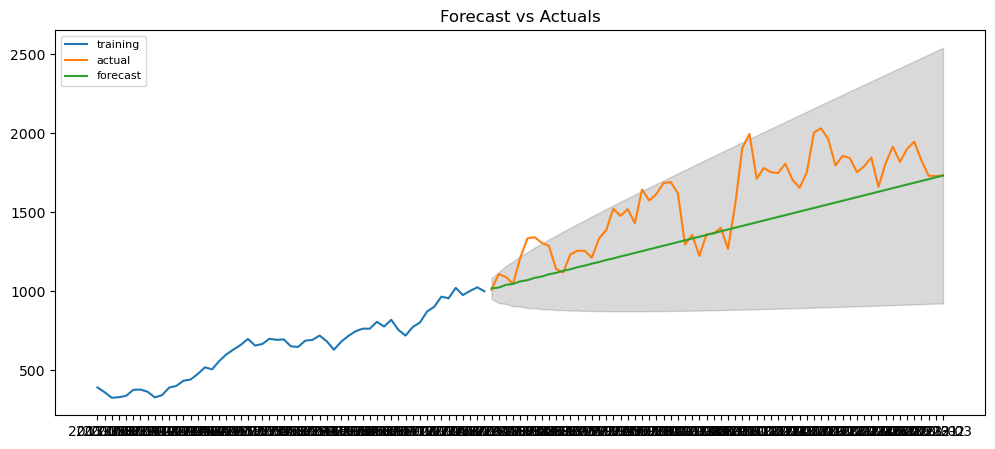

In [72]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show() # 1,2,2

In [73]:
# Assuming forecast_result holds the forecasted values in an array or DataFrame
#forecast_values = forecast_result.values  # Extract forecast values
forecast_values = forecast_result.predicted_mean  # Extract forecast values


In [74]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast_values-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast_values, test.values)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\2315257816.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23452\2315257816.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.12026086212994987,
 'me': -189.70701443328545,
 'mae': 198.805726941945,
 'mpe': -0.11291026822339388,
 'rmse': 243.7070460876713,
 'acf1': nan,
 'corr': 0.8391418691854523,
 'minmax': 0.11997965791669252}

--Around 12.34% MAPE implies the model is about 87.66% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.

In [75]:
from pmdarima import auto_arima
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_2['Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1401.729, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1402.364, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.351, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1404.345, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1402.208, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1399.646, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1397.356, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1397.266, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1403.110, Time=0.21 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1399.209, Time=0.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1398.997, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1402.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -693.633
Date:                Mon, 13 Nov 2023   AIC                           1397.266
Time:                        23:58:52   BIC                           1411.119
Sample:                    05-01-2013   HQIC                          1402.891
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.1190      2.336      5.616      0.000       8.541      17.697
ma.L1         -0.0575      0.075     -0.761      0.446      -0.205       0.090
ma.L2         -0.3240      0.066     -4.943      0.000      -0.452      -0.196
ma.L3         -0.3301      0.068     -4.887      0.000      -0.462      -0.198
sigma2      7422.8285    748.753      9.914      0.000    5955.299    8890.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.89
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              15.56   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

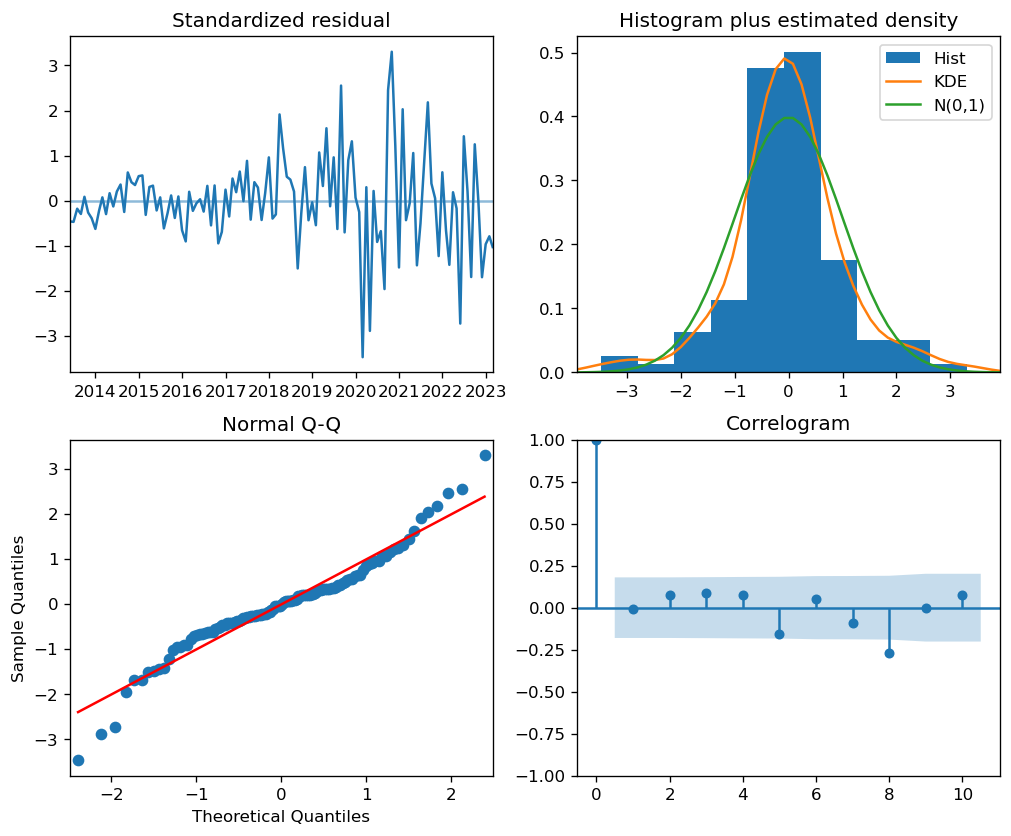

In [76]:
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [77]:
# Forecast
n_periods = 24
fc, confint = stepwise_fit.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df_2.Price), len(df_2.Price)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [85]:
# Forecast
forecast_steps = 64
forecast_result = stepwise_fit.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
index_of_fc = test.index[:forecast_steps]
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [ ]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [93]:
model = ARIMA(df_2['Price'], order=(0, 1, 3))
fitted_model = model.fit()
# Forecast
forecast_steps = 24
forecast_result = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
index_of_fc = test.index[:forecast_steps]
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [94]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


In [98]:
# Assuming your date index is in a datetime format
#fc_series.index = fc_series.index.tz_localize(None)

#fc_series.index = fc_series.index.tz_convert(None)

fc_series.index = fc_series.index.tz_convert('US/Eastern')

AttributeError: 'Index' object has no attribute 'tz_convert'

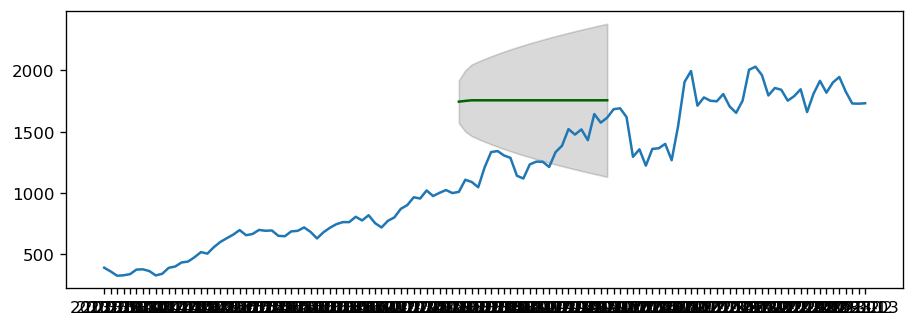

In [99]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

In [92]:
import statsmodels.api as sm

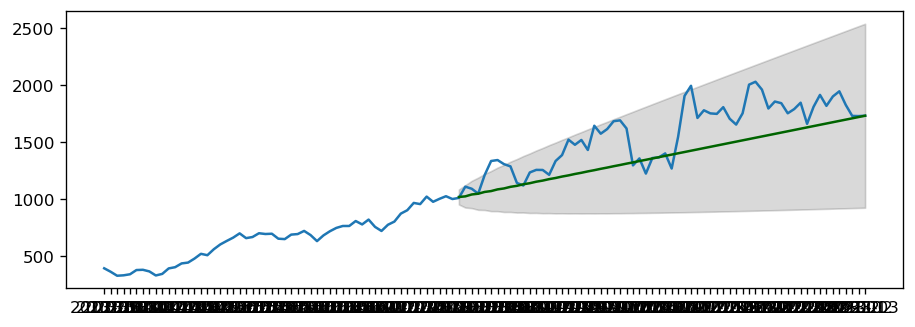

In [141]:

forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [81]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


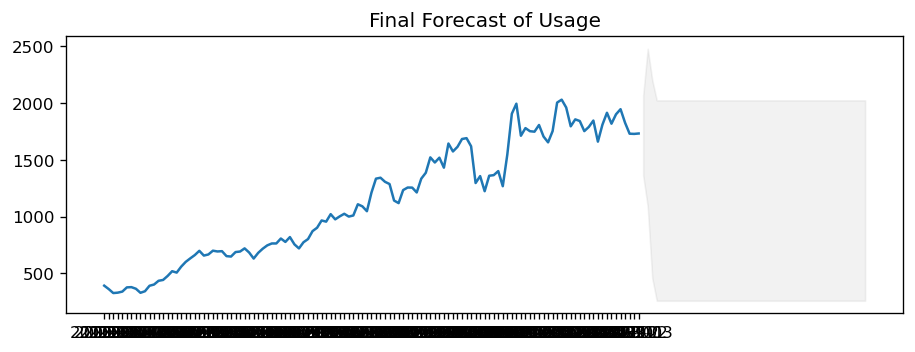

In [140]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)

plt.title("Final Forecast of Usage")
plt.show()

In [139]:
# Assuming you've fitted your ARIMA model
model = ARIMA(df_2['Price'], order=(0, 0, 3))
fitted_model = model.fit()

# Forecast
forecast_steps = 50
forecast_result = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Make as pandas series
index_of_fc = np.arange(len(df_2.Price), len(df_2.Price) + forecast_steps)
fc_series = pd.Series(fc_series, index=index_of_fc)
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [101]:
model = ARIMA(train, order=(1,2,2))  
stepwise_fit = model.fit() 
print(stepwise_fit.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -263.295
Date:                Tue, 14 Nov 2023   AIC                            534.590
Time:                        00:23:06   BIC                            542.471
Sample:                    05-01-2013   HQIC                           537.621
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.151     -5.958      0.000      -1.192      -0.602
ma.L1         -0.0009      4.858     -0.000      1.000      -9.522       9.520
ma.L2         -0.9991      0.256     -3.904      0.0

In [109]:
# Forecast
forecast_steps = 24
forecast_result = stepwise_fit.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=df_2['Price'].index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=df_2['Price'].index[:forecast_steps])

In [110]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [111]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=df_2['Price'].index[:forecast_steps], dtype=float)


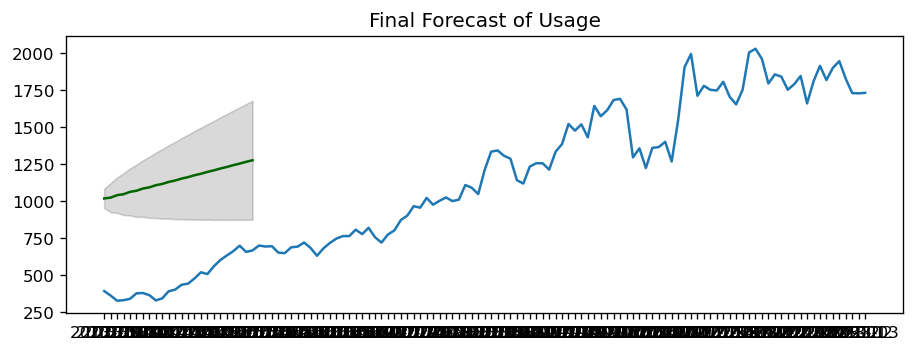

In [112]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()